In [11]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
data = pd.read_csv(fileURL, header = 0)

#### 1
The data that I choose is the donors' blood transfusion information. There are 5 features in this dataset, including Recency(months since last donation), Frequency(total number of donation), Monetary(total blood donated in c.c.), Time(months since first donation) and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). There are 748 instances in the datasets which are collected from 748 donors at random from the donor database.

In [17]:
data.head()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0

In [21]:
data.describe()

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     748.000000                                  748.000000  
mean       34.282086                                    0.237968  
std        24.376714                                    0.426124  
min         2.000000                                    0.000000  
25%        16.000000                                    0.000000  
50%        28.000000                                    0.000000  
75%        50.000000                                    0.000000  
max        98.000000                                    1.000000

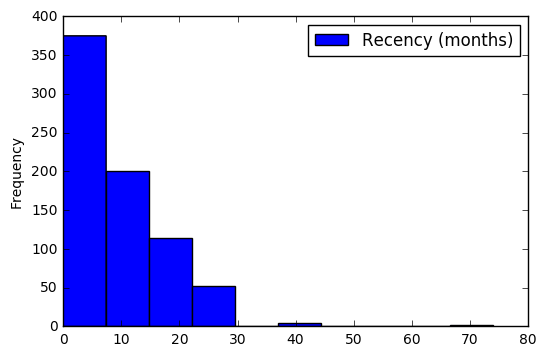

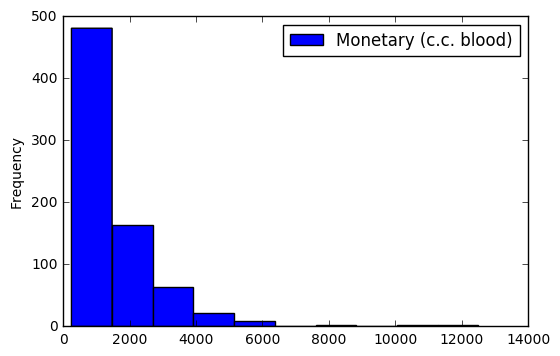

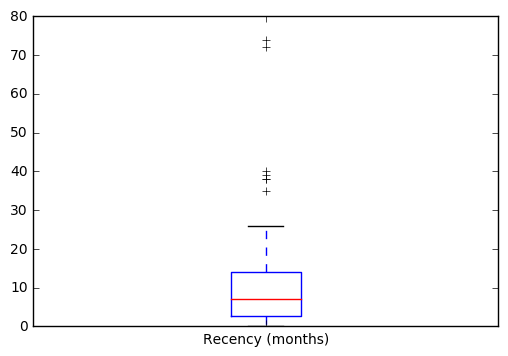

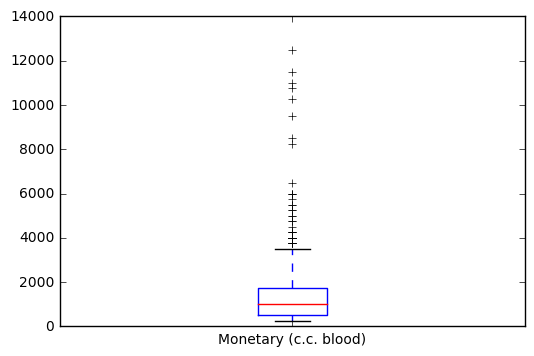

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# Histogram
data[[0]].plot.hist()
data[[2]].plot.hist()
# Box Plots
data[[0]].plot.box()
data[[2]].plot.box()

#### 2
It doesn't have missing data. The features are numeric and the last feature is binary. From the plots, we can see that most people donate blood within 30 months and they tend to donate more than 400 c.c. blood. Also, we can infer that the blood donation is in a uptrend because the number of donators is increasing when the donation time is closer to current time.

In [71]:
from sklearn import tree
X = data[[0,1,2,3]]
Y = data[[4]]

In [72]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [139]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("blood.pdf")

True

In [ ]:
from IPython.display import Image
blood_feature = ['Recency(months)', 'Frequency(times)', 'Monetary(c.c. blood)', 'Time(months)']
blood_class = ['No', 'Yes']

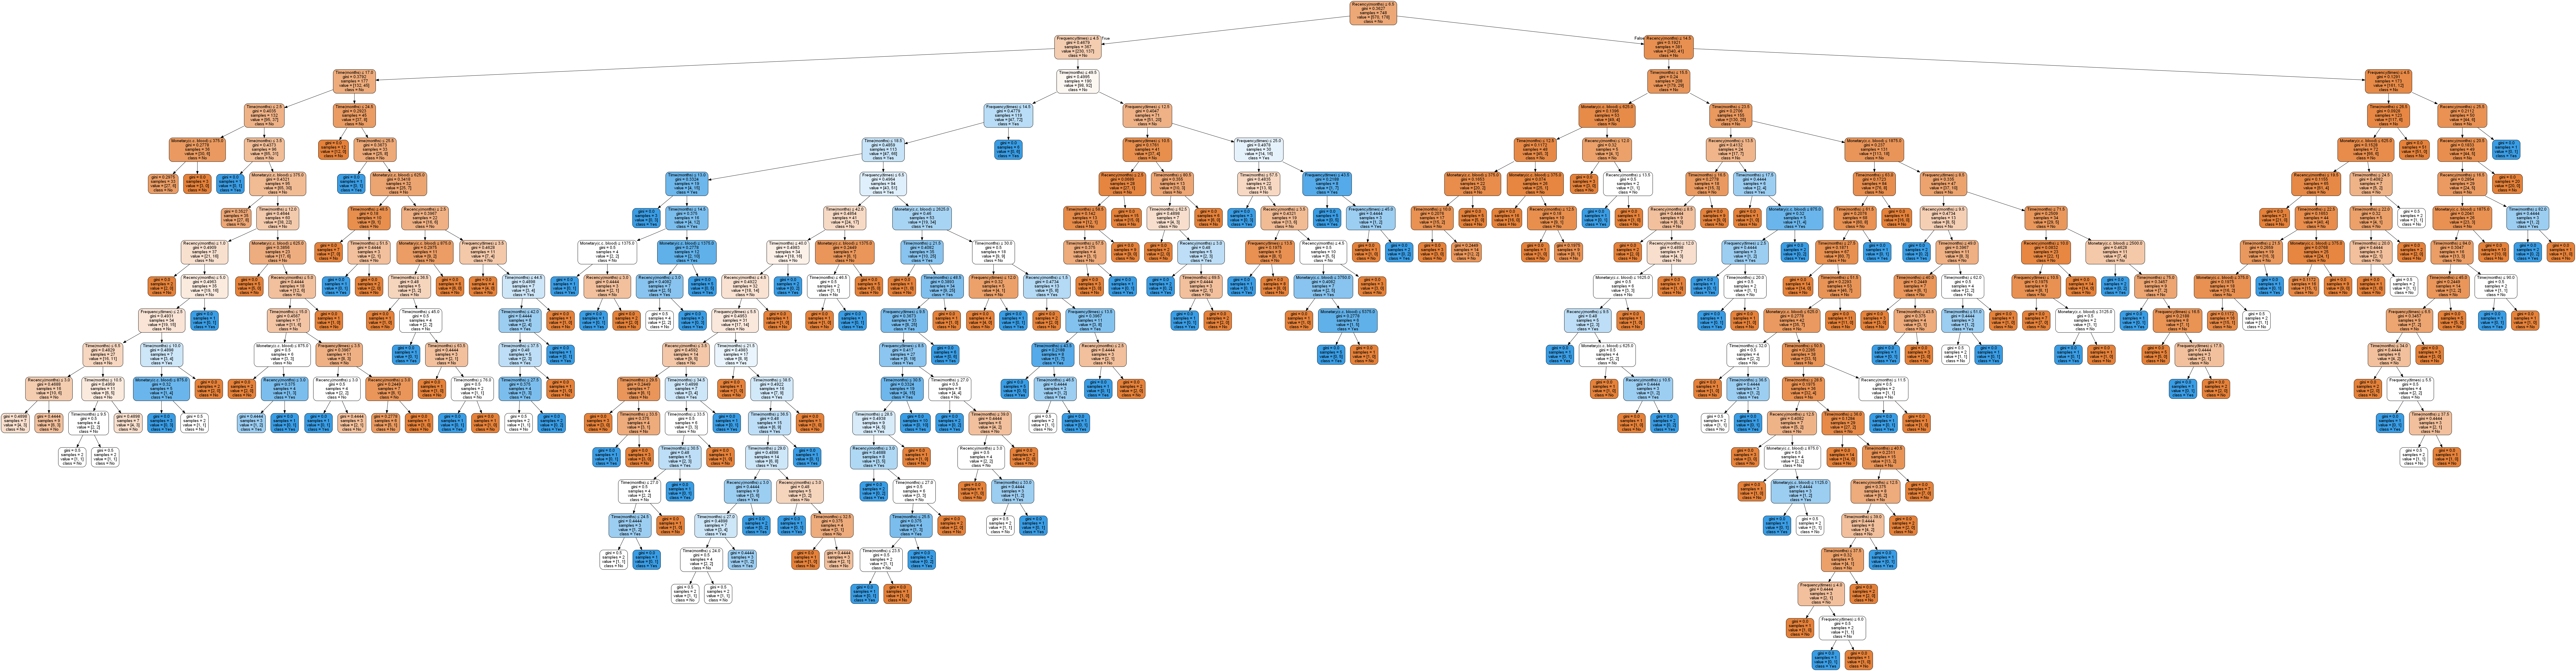

In [95]:
dot_data = tree.export_graphviz(clf, out_file = None,
                               feature_names = blood_feature,
                               class_names = blood_class,
                               filled = True, rounded = True,
                               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [136]:
ins2 = ['50','50', '2000','100']
ins2 = array(ins2).reshape((1,-1))
clf.predict(ins2)

array([1], dtype=int64)

#### 5
At the begining, the decision tree will judges the Recency which is the first feature of the instance. Because the Recency of the new instance higher than 6.5, it will goes to the right branch.
At the next node, the instance doesn't meet the criteria(Recency <= 14.5), it will goes right and it will continue goes right since the Frequency is greater than 4.5 and Recency is greater than 25.5. 
After that, it reaches the destination. The decision is made by the tree, which is Yes.

This result looks resonable because the Frequency is really high, which means this person donates blood very often. He or she is very likely to donate his blood in March 2007.

However, this result is not correct. This dataset is donated in October 3, 2008 and the Recency of the new instance is 50, which means last time this person donated his or her blood is 50 months ago. Apparently, time is contradictory. 

The reason is there is only one sample in the dataset whose Recency is greater than 25.5. This only sample is not representative and could be very easily influenced by noise. 

In [167]:
X_new = data[[0,1,2]]
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X_new, Y)

In [175]:
dot_data2 = tree.export_graphviz(clf2, out_file=None)
b_feature =  ['Recency','Frequency', 'Monetary']

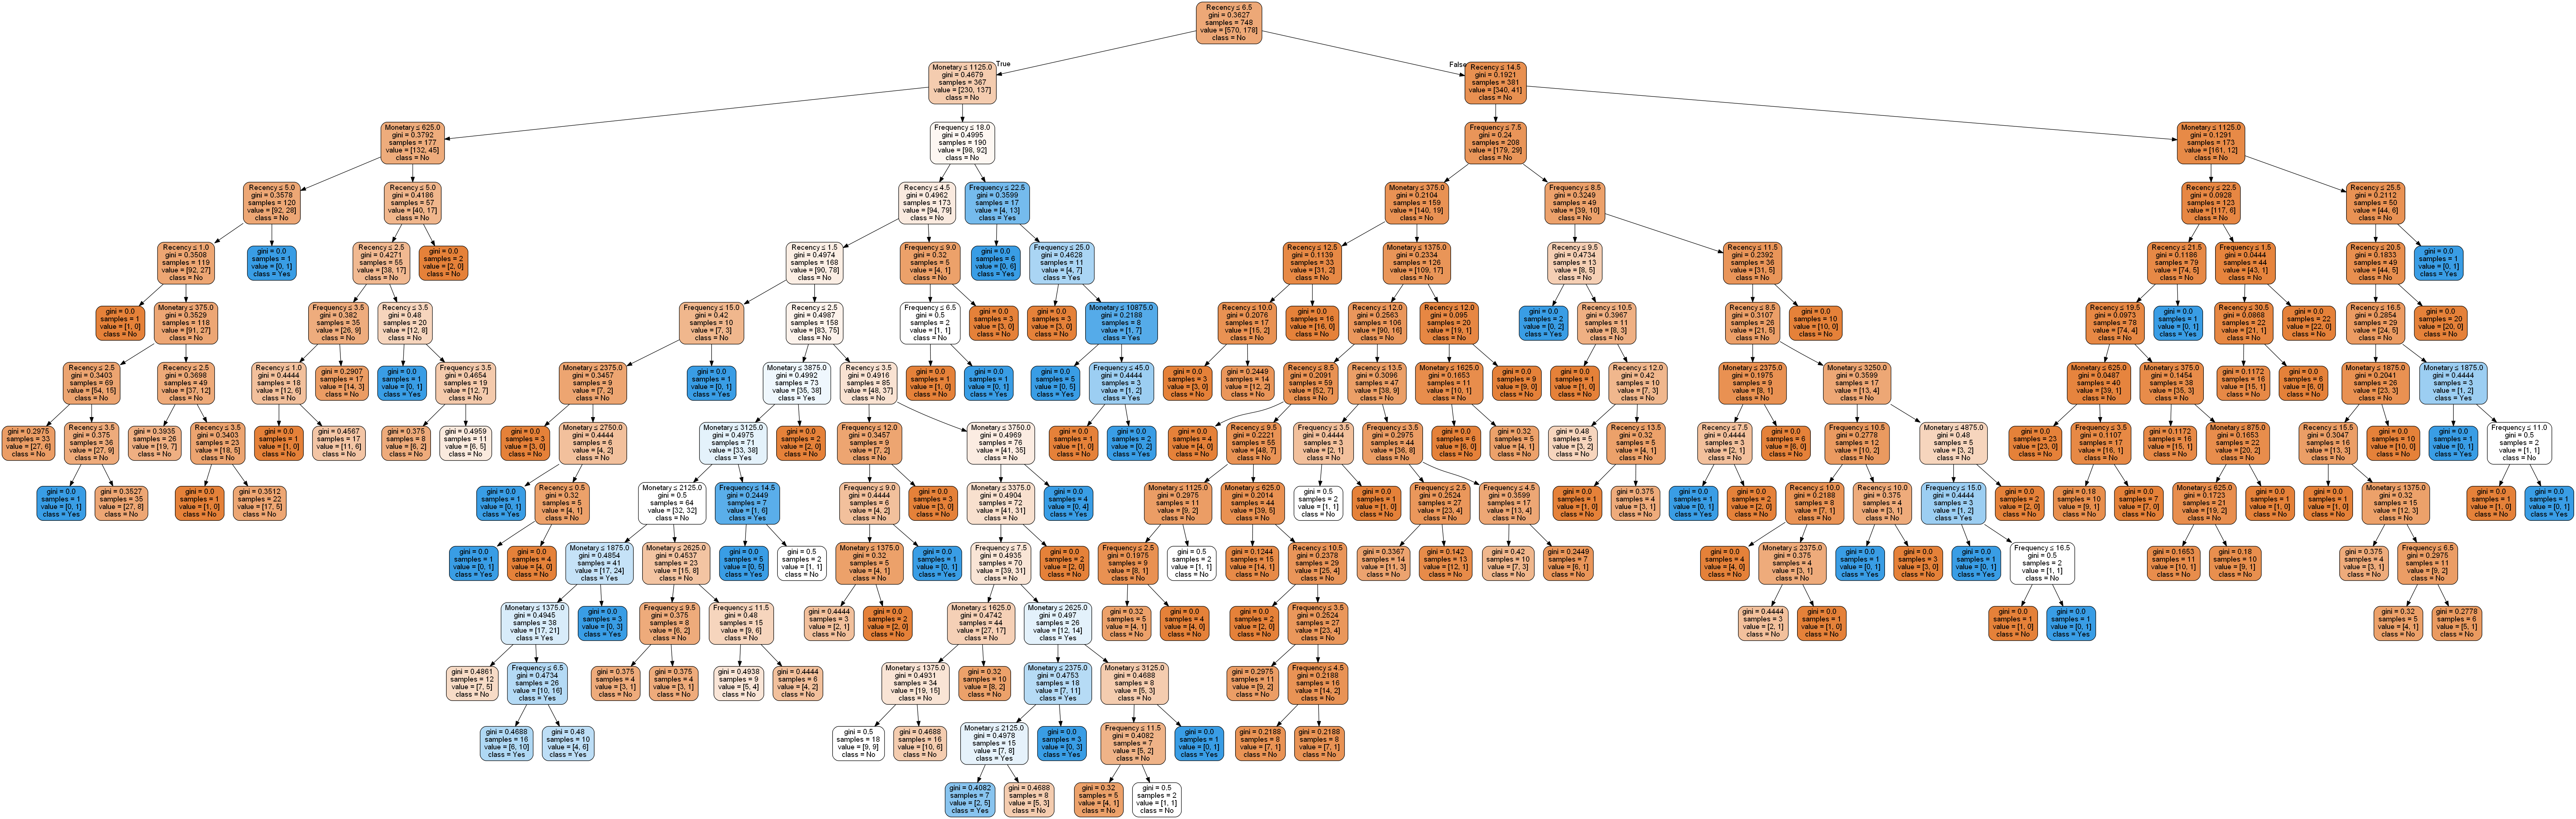

In [176]:
dot_data2 = tree.export_graphviz(clf2, out_file = None, 
                               feature_names = b_feature,
                               class_names = blood_class,
                               filled = True, rounded = True, 
                               special_characters = True)
graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(graph2.create_png())

In [183]:
ins1 = ['50','50', '2000']
ins1 = array(ins1).reshape((1,-1))
clf2.predict(ins1)

array([1], dtype=int64)

I think some features may be disturb to our judgement, so this time I tried to use three but not four features to generate the decision tree. We can see the branches are lot less than the last tree. Unfortunately, it still couldn't well predict the given instance. 

My thought is this dataset is not good for classification since its features' value are very widely ranged. It's very hard to determine thresholds to divide data into different classes. 

At last, I'm really sorry about my late submission. I went to Chicago to watch my favorite basketball player's game and I came back yesterday. I tried to finish this assignment on time but there was an Algorithm quiz on Monday that I had to review it.I tried my best but still can't catch the time. I'm really sorry about it.